In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import json

dummy_fits = Polyfit('dummy_data/fits.npz', input_h5='dummy_data/inputdata.h5', order=3, covariance = True)
obs_sample = None #don't sample
p_guess = [1.7,-1.1]
dummy_tune = Paramtune('dummy_data/fits.npz', 'dummy_data/target_data.json', obs_sample, p_guess, covariance = True)

Fitting observables:  ['/func0', '/func1']
/func0#0 
 [  80.62972621  104.38691504  -78.86316804   22.8934713  -118.4974257
    7.38508711  -13.12712689  -45.0598705     9.27279875    0.98583797] 
 [ 63.351202   156.53672883  37.81152827 142.35190859  47.69563861
  12.44700242  46.14162884  19.2047809    8.43895188   2.34190177] 
end
/func0#1 
 [  -9.06684082 -151.08618601  -55.02320836 -204.8598869   -59.50088039
   10.58171505  -83.664558    -26.22340188    1.5444825    -1.49583436] 
 [ 95.21013417 235.25809271  56.82671467 213.93981311  71.68148366
  18.70652384  69.34597188  28.8627478   12.68284919   3.51962985] 
end
/func0#2 
 [150.4308984  289.43369588 -77.35680929 224.11656476 -67.15013875
  23.15696082  43.28677066 -51.44319631 -11.12765578  -6.7135658 ] 
 [ 74.36241411 183.74472283  44.38363338 167.09440772  55.98572273
  14.61044336  54.16160709  22.54280621   9.90574472   2.74895288] 
end
/func0#3 
 [ 154.72120367  334.70876121  -72.98427325  243.493349   -138.8571259
   -3

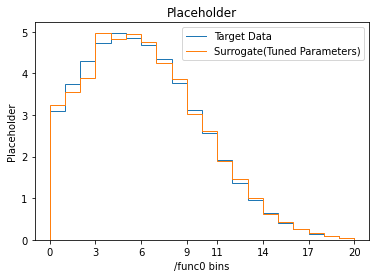

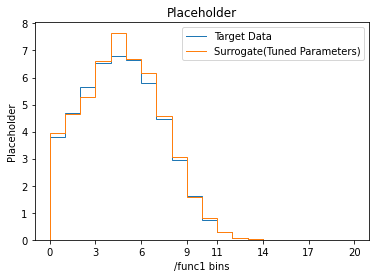

In [2]:
dummy_tune.graph_tune('/func0')
dummy_tune.graph_tune('/func1')